* reference  
https://github.com/eriklindernoren/ML-From-Scratch

In [3]:
import math
import numpy as np

#### update theta  
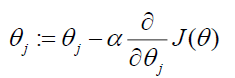      


### derivative of loss function (gradient)  
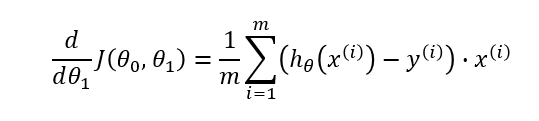      


In [4]:
# base class
class Regression(object):
    """ Base regression model. Models the relationship between a scalar dependent variable y and the independent 
    variables X. 
    Parameters:
    -----------
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, n_iterations, learning_rate):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate

    def initialize_weights(self, n_features):
        """ Initialize weights randomly [-1/N, 1/N] """
        # weights shape (n_features,)
        limit = 1 / math.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, ))

    def fit(self, X, y):
        # Insert constant ones for bias weights (intercept)
        X = np.insert(X, 0, 1, axis=1)
        self.training_errors = []
        # includes intercept weights
        self.initialize_weights(n_features=X.shape[1])

        # Do gradient descent for n_iterations
        # all training data
        for i in range(self.n_iterations):
            # weights * X
            y_pred = X.dot(self.w)
            # Calculate l2 loss
            # loss function
            mse = np.mean(0.5 * (y - y_pred)**2 + self.regularization(self.w))
            self.training_errors.append(mse)
            # Gradient of l2 loss w.r.t w
            # gradient for loss function (derivative)
            # (h(x) - y)*x
            grad_w = -(y - y_pred).dot(X) + self.regularization.grad(self.w)
            # Update the weights
            # "descent" so is negative "-"
            self.w -= self.learning_rate * grad_w

    def predict(self, X):
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        y_pred = X.dot(self.w)
        return y_pred

https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.uniform.html

In [5]:
np.random.uniform(-5,5, size=(3,4))

array([[-0.15842033, -0.06743961, -2.90741654, -4.57541397],
       [ 3.30698786, -0.93492829, -4.8319336 ,  2.30124392],
       [ 1.37246389,  4.45184495,  3.3948535 , -0.42830209]])

In [7]:
z=np.array(np.random.randint(-5,10, size=6)).reshape(-1,2)
z

array([[ 2, -3],
       [-1, -2],
       [ 2, -2]])

https://www.cnblogs.com/MrLJC/p/4823499.html
___

In [8]:
np.insert(z, 0, 9, axis=1)

array([[ 9,  2, -3],
       [ 9, -1, -2],
       [ 9,  2, -2]])

___

In [119]:
class LinearRegression(Regression):
    """Linear model.
    Parameters:
    -----------
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    gradient_descent: boolean
        True or false depending if gradient descent should be used when training. If 
        false then we use batch optimization by least squares.
    """
    def __init__(self, n_iterations=100, learning_rate=0.001, gradient_descent=True):
        # flag
        self.gradient_descent = gradient_descent
        # No regularization
        self.regularization = lambda x: 0
        self.regularization.grad = lambda x: 0
        # inherit regression base class
        super(LinearRegression, self).__init__(n_iterations=n_iterations,
                                            learning_rate=learning_rate)
        
    def fit(self, X, y):
        # flag
        # If not gradient descent => Least squares approximation of w
        # w -> weights
        if not self.gradient_descent:
            # Insert constant ones for bias weights (intercept)
            X = np.insert(X, 0, 1, axis=1)
            
            # use numpy least square
#             # Calculate weights by least squares (using Moore-Penrose pseudoinverse)
#             U, S, V = np.linalg.svd(X.T.dot(X))
#             S = np.diag(S)
#             X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
#             self.w = X_sq_reg_inv.dot(X.T).dot(y)

            self.w = np.linalg.lstsq(X, y, rcond=-1)[0]
    
        else:
            super(LinearRegression, self).fit(X, y)

In [100]:
from sklearn import datasets
data = datasets.load_boston(return_X_y=True)
X, y = data
print X.shape, y.shape

(506, 13) (506,)


In [47]:
X = np.insert(X, 0, 1, axis=1)
X.shape

(506, 14)

In [52]:
def RMSE(y_t, y_p):
    one = reduce(lambda x,y: x+y, map(lambda x: abs(x[0]-x[1])**2, zip(y_t, y_p)))
    two = one/len(y_t)
    trd = two**0.5
    return trd

In [80]:
U, S, V = np.linalg.svd(X.T.dot(X))
S = np.diag(S)
X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
weights = X_sq_reg_inv.dot(X.T).dot(y)

In [81]:
theta = np.linalg.lstsq(X, y, rcond=-1)[0]

In [82]:
print weights

[-5.36267625 -0.85445837  4.13205319 -2.6746504   8.62654917 36.17152557
 13.42533588  6.57977653 -2.60637625  0.55472933 -2.35315109 -0.16728502
  0.82490454  0.26932646]


In [83]:
print theta

[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]


In [85]:
RMSE(y, np.dot(X, theta))

4.6795063006355155

### the best way to solve a matrix problem 
https://stackoverflow.com/questions/34170618/normal-equation-and-numpy-least-squares-solve-methods-difference-in-regress

### the SVD method is less computation intensive (22% less)
### but less accurate ?

In [70]:
(343-269)/343.0

0.21574344023323616

In [68]:
%%timeit
theta = np.linalg.lstsq(X, y, rcond=-1)[0]

1000 loops, best of 3: 318 µs per loop


In [69]:
%%timeit
U, S, V = np.linalg.svd(X.T.dot(X))
S = np.diag(S)
X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
weights = X_sq_reg_inv.dot(X.T).dot(y)

1000 loops, best of 3: 267 µs per loop


___

In [168]:
lr = LinearRegression(gradient_descent=False)
lr

In [169]:
lr.fit(X, y)

In [170]:
lr.w

array([ 3.64911033e+01, -1.07170557e-01,  4.63952195e-02,  2.08602395e-02,
        2.68856140e+00, -1.77957587e+01,  3.80475246e+00,  7.51061703e-04,
       -1.47575880e+00,  3.05655038e-01, -1.23293463e-02, -9.53463555e-01,
        9.39251272e-03, -5.25466633e-01])

In [171]:
RMSE(y, lr.predict(X))

4.6795063006355155

In [185]:
lr2 = LinearRegression(gradient_descent=True, learning_rate=1e-8)
lr2

In [186]:
lr2.fit(X, y)

In [187]:
RMSE(y, lr2.predict(X))

8.954086205774592

In [148]:
import pandas as pd

In [150]:
pd.Series(y).describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

plt.rcParams['figure.figsize']=[10,6]

### true value, predicted value, error

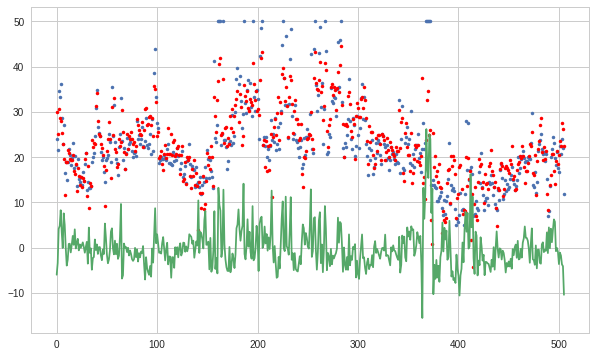

In [190]:
plt.plot(y, '.')
plt.plot(lr.predict(X), 'r.')
plt.plot(y-lr.predict(X))

In [285]:
from itertools import combinations_with_replacement

In [298]:
print list(combinations_with_replacement([1,5,99], 2))

[(1, 1), (1, 5), (1, 99), (5, 5), (5, 99), (99, 99)]


https://www.calculatorsoup.com/calculators/discretemathematics/combinationsreplacement.php

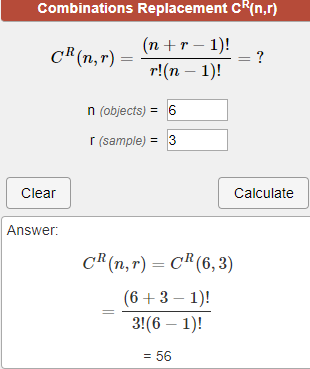      


### generate polynomial features

In [276]:
def polynomial_features(X, degree):
    
    n_samples, n_features = np.shape(X)
    
    def index_combinations():
        combs = [combinations_with_replacement(range(n_features), i) for i in range(0, degree + 1)]
        flat_combs = [item for sublist in combs for item in sublist]
        return flat_combs
    
    combinations = index_combinations()
    n_output_features = len(combinations)
    X_new = np.empty((n_samples, n_output_features))
    
    
    for i, index_combs in enumerate(combinations):  
        X_new[:, i] = np.prod(X[:, index_combs], axis=1)

    return X_new

In [288]:
np.empty((2,3))

array([[0.15389675, 0.05129892, 0.41039134],
       [0.82078268, 0.05129892, 0.35909242]])

In [304]:
np.prod([1,3,4,5,6,7]), 1*3*4*5*6*7

(2520, 2520)

In [299]:
tmp = np.arange(6).reshape(3, 2)
tmp

array([[0, 1],
       [2, 3],
       [4, 5]])

In [302]:
polynomial_features(tmp, 3)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

___

In [ ]:
def normalize(X, axis=-1, order=2):
    """ Normalize the dataset X """
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [277]:
np.atleast_1d(0.99)

array([0.99])

In [278]:
tmp = np.array(arr+[0,7])
tmp

array([ 3,  1,  8, 16,  0,  7])

In [279]:
tmp[tmp==0]

array([0])

In [280]:
tmp[tmp==0]=1
tmp

array([ 3,  1,  8, 16,  1,  7])

In [281]:
tmp.shape

(6,)

In [282]:
tmp2 = np.expand_dims(tmp,-1)
print tmp2.shape
tmp2

(6, 1)


array([[ 3],
       [ 1],
       [ 8],
       [16],
       [ 1],
       [ 7]])

In [283]:
print tmp.shape
print normalize(tmp).shape
normalize(tmp)

(6,)
(1, 6)


array([[0.15389675, 0.05129892, 0.41039134, 0.82078268, 0.05129892,
        0.35909242]])

lasso
___

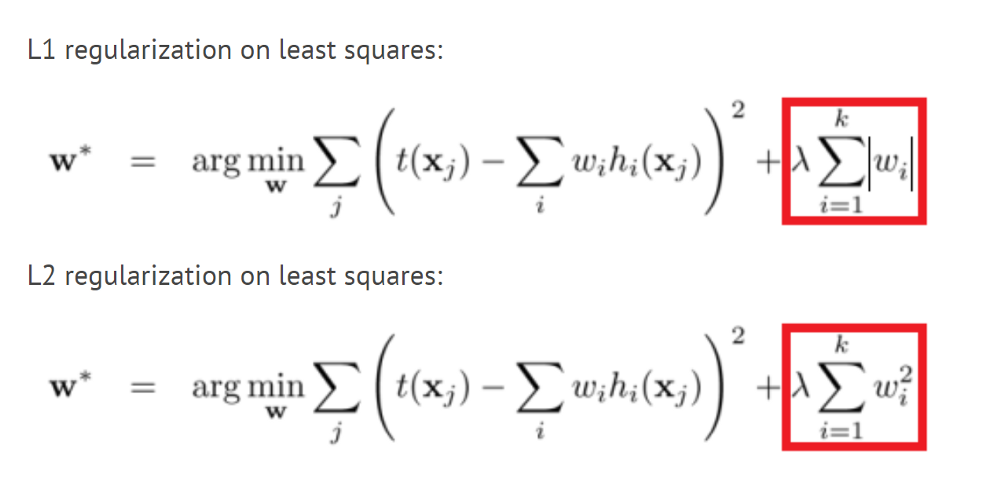


In [305]:
class l1_regularization():
    """ Regularization for Lasso Regression """
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * np.linalg.norm(w)

    def grad(self, w):
        return self.alpha * np.sign(w)

### L1 derivative ---- gradient
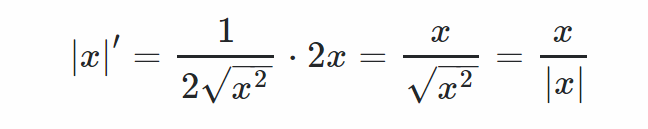      
 


In [306]:
class l2_regularization():
    """ Regularization for Ridge Regression """
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * 0.5 *  w.T.dot(w)

    def grad(self, w):
        return self.alpha * w    

#### L2 derivative ---- gradient  
   * just alpha * w


## lasso Regression
### - L1 Regularization

In [191]:
class LassoRegression(Regression):
    """Linear regression model with a regularization factor which does both variable selection 
    and regularization. Model that tries to balance the fit of the model with respect to the training 
    data and the complexity of the model. A large regularization factor with decreases the variance of 
    the model and do para.
    Parameters:
    -----------
    
    degree: int
        The degree of the polynomial that the independent variable X will be transformed to.
    reg_factor: float
        The factor that will determine the amount of regularization and feature
        shrinkage. 
        
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    
    def __init__(self, degree, reg_factor, n_iterations=3000, learning_rate=0.01):
        
        self.degree = degree
        self.regularization = l1_regularization(alpha=reg_factor)
        super(LassoRegression, self).__init__(n_iterations, 
                                            learning_rate)

    def fit(self, X, y):
        X = normalize(polynomial_features(X, degree=self.degree))
        super(LassoRegression, self).fit(X, y)

    def predict(self, X):
        X = normalize(polynomial_features(X, degree=self.degree))
        return super(LassoRegression, self).predict(X)


np.linalg.norm?  
https://docs.scipy.org/doc/numpy-1.9.3/reference/generated/numpy.linalg.norm.html

In [219]:
arr = [3,1,8,16]

In [195]:
np.linalg.norm(arr)

18.16590212458495

In [209]:
def l1norm(arr):
#     m = sum(arr)/float(len(arr))
    d = map(lambda x: abs(x), arr)
    return sum(d)

In [210]:
def l2norm(arr):
#     m = sum(arr)/float(len(arr))
    d = map(lambda x: x**2, arr)
    
    return (sum(d))**0.5

In [222]:
np.linalg.norm(arr, axis=-1)

18.16590212458495

In [212]:
l1norm(arr), l2norm(arr), np.linalg.norm(arr, ord=1), np.linalg.norm(arr, ord=2)

(28, 18.16590212458495, 28.0, 18.16590212458495)

http://blog.csdn.net/zouxy09/article/details/24971995

In [217]:
np.array(arr).dot(np.array(arr).T)

330

### PolynomialRegression
#### No regularization

In [308]:
class PolynomialRegression(Regression):
    """Performs a non-linear transformation of the data before fitting the model
    and doing predictions which allows for doing non-linear regression.
    Parameters:
    -----------
    degree: int
        The degree of the polynomial that the independent variable X will be transformed to.
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, degree, n_iterations=3000, learning_rate=0.001):
        self.degree = degree
        # No regularization
        self.regularization = lambda x: 0
        self.regularization.grad = lambda x: 0
        super(PolynomialRegression, self).__init__(n_iterations=n_iterations,
                                                learning_rate=learning_rate)

    def fit(self, X, y):
        X = polynomial_features(X, degree=self.degree)
        super(PolynomialRegression, self).fit(X, y)

    def predict(self, X):
        X = polynomial_features(X, degree=self.degree)
        return super(PolynomialRegression, self).predict(X)


## Ridge Regression
### - L2 Regularization

In [310]:
class RidgeRegression(Regression):
    """Also referred to as Tikhonov regularization. Linear regression model with a regularization factor.
    Model that tries to balance the fit of the model with respect to the training data and the complexity
    of the model. A large regularization factor with decreases the variance of the model.
    Parameters:
    -----------
    reg_factor: float
        The factor that will determine the amount of regularization and feature
        shrinkage. 
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, reg_factor, n_iterations=1000, learning_rate=0.001):
        self.regularization = l2_regularization(alpha=reg_factor)
        super(RidgeRegression, self).__init__(n_iterations, 
                                            learning_rate)

### PolynomialRidgeRegression
#### add Polynomial feature

In [311]:
class PolynomialRidgeRegression(Regression):
    """Similar to regular ridge regression except that the data is transformed to allow
    for polynomial regression.
    Parameters:
    -----------
    degree: int
        The degree of the polynomial that the independent variable X will be transformed to.
    reg_factor: float
        The factor that will determine the amount of regularization and feature
        shrinkage. 
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, degree, reg_factor, n_iterations=3000, learning_rate=0.01, gradient_descent=True):
        self.degree = degree
        self.regularization = l2_regularization(alpha=reg_factor)
        super(PolynomialRidgeRegression, self).__init__(n_iterations, 
                                                        learning_rate)

    def fit(self, X, y):
        X = normalize(polynomial_features(X, degree=self.degree))
        super(PolynomialRidgeRegression, self).fit(X, y)

    def predict(self, X):
        X = normalize(polynomial_features(X, degree=self.degree))
        return super(PolynomialRidgeRegression, self).predict(X)

## ElasticNet
### - combination of L1 and L2 Regularization

In [312]:
class l1_l2_regularization():
    """ Regularization for Elastic Net Regression """
    def __init__(self, alpha, l1_ratio=0.5):
        self.alpha = alpha
        self.l1_ratio = l1_ratio

    def __call__(self, w):
        l1_contr = self.l1_ratio * np.linalg.norm(w)
        l2_contr = (1 - self.l1_ratio) * 0.5 * w.T.dot(w) 
        return self.alpha * (l1_contr + l2_contr)

    def grad(self, w):
        l1_contr = self.l1_ratio * np.sign(w)
        l2_contr = (1 - self.l1_ratio) * w
        return self.alpha * (l1_contr + l2_contr) 

In [313]:
class ElasticNet(Regression):
    """ Regression where a combination of l1 and l2 regularization are used. The
    ratio of their contributions are set with the 'l1_ratio' parameter.
    Parameters:
    -----------
    degree: int
        The degree of the polynomial that the independent variable X will be transformed to.
    reg_factor: float
        The factor that will determine the amount of regularization and feature
        shrinkage. 
    l1_ration: float
        Weighs the contribution of l1 and l2 regularization.
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, degree=1, reg_factor=0.05, l1_ratio=0.5, n_iterations=3000, 
                learning_rate=0.01):
        self.degree = degree
        self.regularization = l1_l2_regularization(alpha=reg_factor, l1_ratio=l1_ratio)
        super(ElasticNet, self).__init__(n_iterations, 
                                        learning_rate)

    def fit(self, X, y):
        X = normalize(polynomial_features(X, degree=self.degree))
        super(ElasticNet, self).fit(X, y)

    def predict(self, X):
        X = normalize(polynomial_features(X, degree=self.degree))
        return super(ElasticNet, self).predict(X)

reference  
https://web.stanford.edu/~hastie/TALKS/enet_talk.pdf

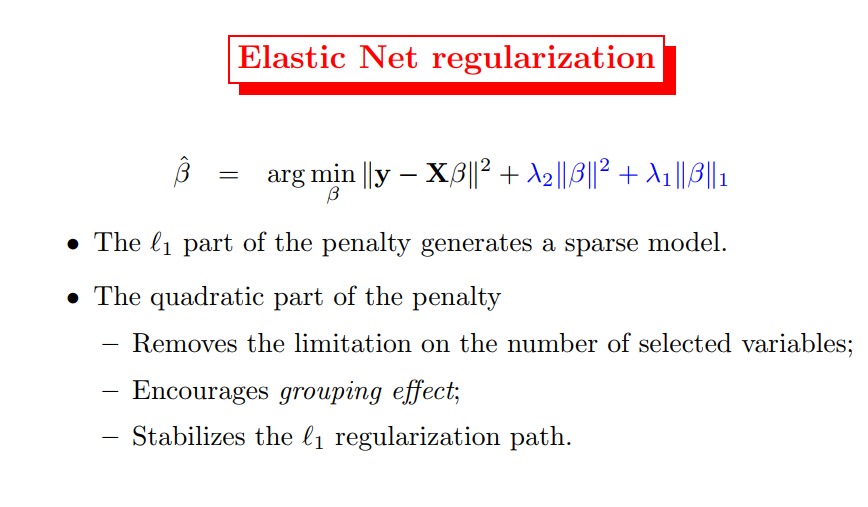      


<img src="attachment:image.png"  width="700" align="left">      


<img src="attachment:image.png"  width="700" align="left">      


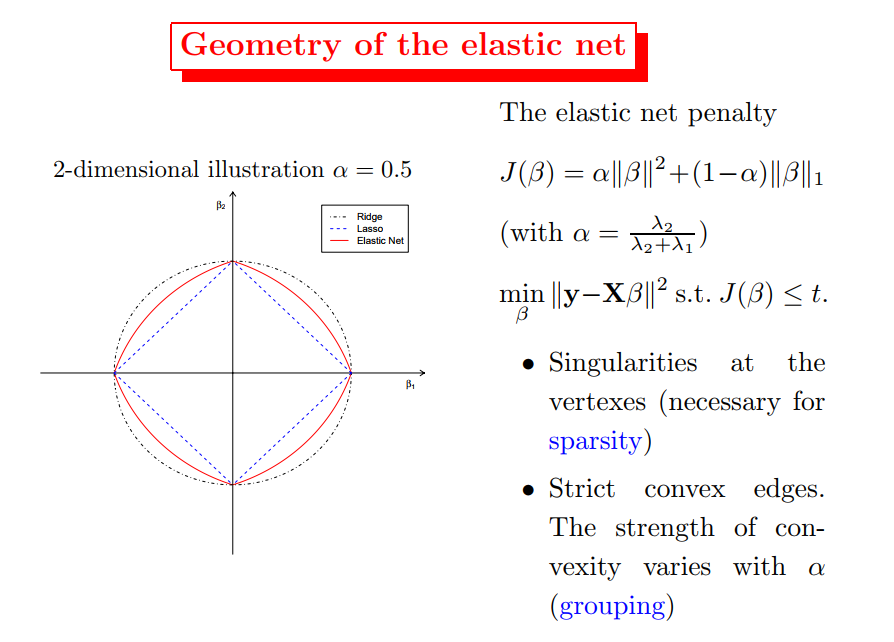      


### Ridge VS Lasso
https://stats.stackexchange.com/questions/866/when-should-i-use-lasso-vs-ridge

In [315]:
np.matrix.T?